In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(r"C:\Users\SARA\Downloads\BostonHousing.csv")

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
print("\n checking for missing values")
df.isna().sum()


 checking for missing values


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [15]:
target_feature = "medv"
if target_feature not in df.columns:
    raise ValueError(f"Target feature , {target_feature}, not in dataset")
y = df[target_feature]    
x = df.drop(columns =[target_feature])

In [17]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [19]:
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [27]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 7)


In [29]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [35]:
train_score = regression.score(x_train, y_train) *100
print(f"\n train score for linear regression, {train_score:.2f}%")


 train score for linear regression, 76.99%


In [39]:
y_pred = regression.predict(x_test)

In [43]:
r2 = r2_score(y_test, y_pred) *100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [47]:
print(f"R2 : {r2:.2f}")
print(f"Mean absolute error : {mae:.4f}")
print(f"Mean squared error : {mse:.4f}")
print(f"root mean squared error : {rmse:.4f}")

R2 : 57.85
Mean absolute error : 3.7808
Mean squared error : 34.0565
root mean squared error : 5.8358


In [51]:
df_results= pd.DataFrame({"Actual:": y_test , "predicted:": y_pred , "variance:": y_test- y_pred})
df_results.head()

,Actual:,predicted:,variance:
357,21.7,23.016076,-1.316076
337,18.5,19.175452,-0.675452
327,22.2,19.931333,2.268667
13,20.4,19.192223,1.207777
418,8.8,4.733661,4.066339


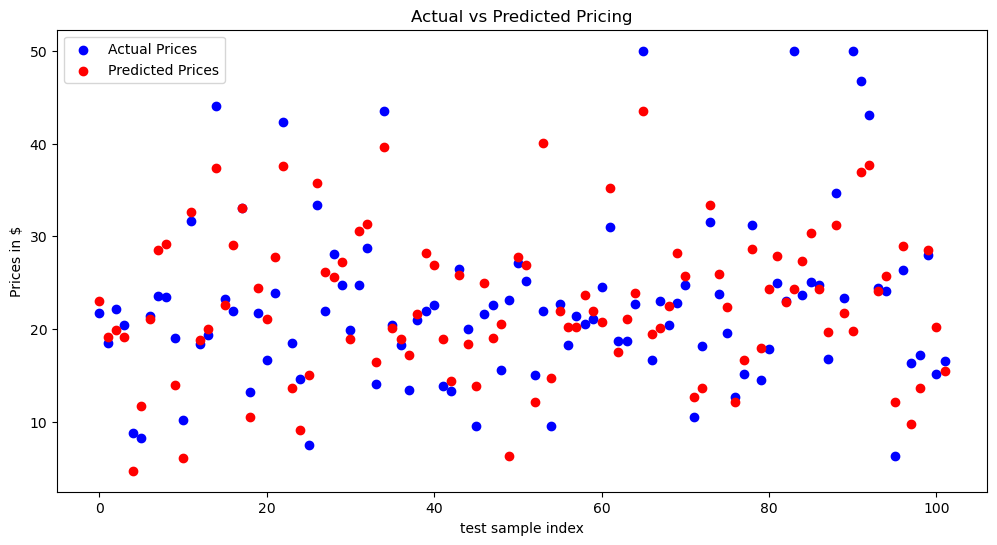

In [59]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)), y_test , color="blue", label="Actual Prices")
plt.scatter(range(len(y_pred)), y_pred , color="red", label="Predicted Prices")
plt.legend()
plt.xlabel("test sample index")
plt.ylabel("Prices in $")
plt.title("Actual vs Predicted Pricing")
plt.show()

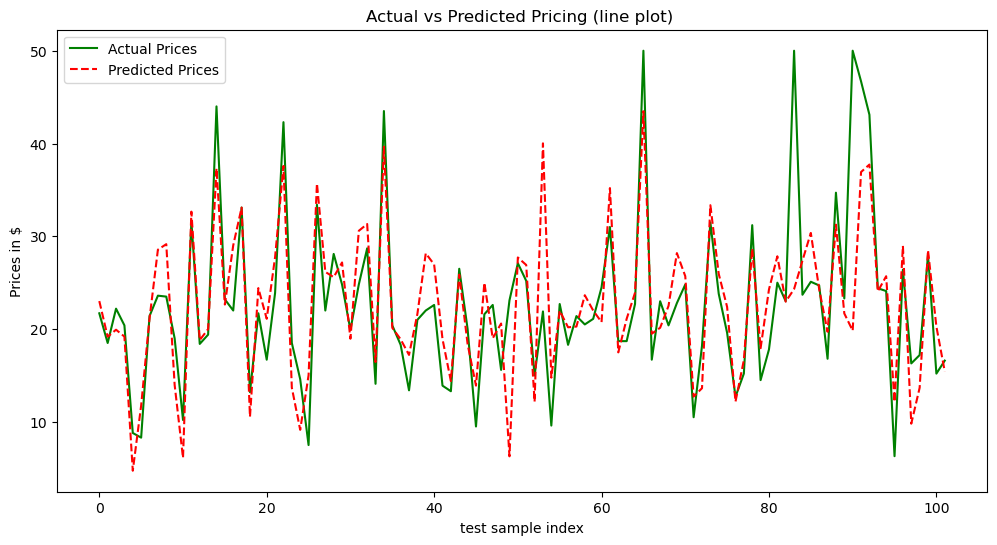

In [67]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test , color="green", label="Actual Prices")
plt.plot(range(len(y_pred)), y_pred , color="red", label="Predicted Prices", linestyle ="dashed")
plt.legend()
plt.xlabel("test sample index")
plt.ylabel("Prices in $")
plt.title("Actual vs Predicted Pricing (line plot) ")
plt.show()